In [70]:
# chapter 4
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

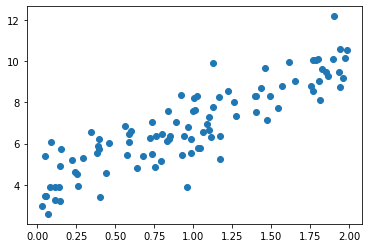

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
X_b

array([[1.        , 1.03067531],
       [1.        , 0.64158095],
       [1.        , 0.589171  ],
       [1.        , 1.97221481],
       [1.        , 0.98829266],
       [1.        , 0.83287147],
       [1.        , 0.40080016],
       [1.        , 0.57357929],
       [1.        , 0.85013683],
       [1.        , 0.2211037 ],
       [1.        , 0.88634216],
       [1.        , 0.98423144],
       [1.        , 0.79375202],
       [1.        , 1.16864261],
       [1.        , 0.73240643],
       [1.        , 0.05255503],
       [1.        , 1.40434915],
       [1.        , 0.13638783],
       [1.        , 0.1502744 ],
       [1.        , 0.58637993],
       [1.        , 0.11046458],
       [1.        , 0.08507809],
       [1.        , 0.07870397],
       [1.        , 1.93922517],
       [1.        , 1.39425279],
       [1.        , 0.75866506],
       [1.        , 0.91872591],
       [1.        , 0.46257206],
       [1.        , 1.12668381],
       [1.        , 0.03127532],
       [1.

In [9]:
X_b.T.dot(X_b)

array([[100.        ,  97.24569002],
       [ 97.24569002, 129.17336247]])

In [10]:
theta_best

array([[3.86849119],
       [3.07817247]])

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86849119],
       [10.02483613]])

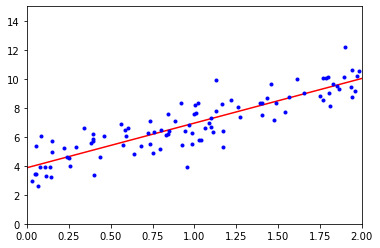

In [13]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86849119]), array([[3.07817247]]))

In [16]:
lin_reg.predict(X_new)

array([[ 3.86849119],
       [10.02483613]])

In [18]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.86849119],
       [3.07817247]])

In [19]:
np.linalg.pinv(X_b).dot(y)

array([[3.86849119],
       [3.07817247]])

In [20]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 1000

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    


In [21]:
theta

array([[3.86076497],
       [3.08482621]])

In [22]:
eta = 0.5 # learning rate
n_iterations = 1000
m = 1000

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    


In [23]:
theta

array([[3.86849108],
       [3.07817257]])

In [24]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[3.71996672],
       [3.19995852]])

In [27]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [28]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.82385123]), array([3.04420588]))

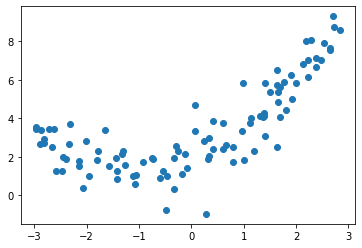

In [81]:
# Polynomial Regression
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.scatter(X,y)
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.92730386])

In [34]:
X_poly[0]

array([-1.92730386,  3.71450018])

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.82949354]), array([[1.03981194, 0.55408033]]))

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

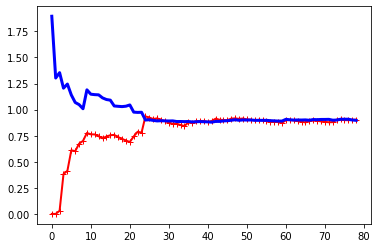

In [49]:
# need to use the initial X, y in the beginning of this chapter
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [63]:
# 10th polynomial
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

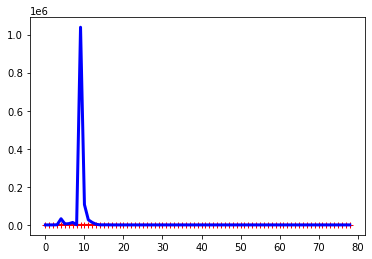

In [64]:
plot_learning_curves(polynomial_regression, X, y)

In [82]:
# Ridge regression --- keeps the weights as small as possible
# Be sure to scale the data before performing Ridge Regression
# Increasing alpha leads to flatter predictions - reduces model's variances but increases its biases

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [83]:
ridge_reg.predict([[1.5]])

array([[4.80227865]])

In [84]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.79548735])

In [85]:
# Lasso regression - least absolute shrinkage and selection operator regression
# Tends to completely eliminate the weights of the least important features (=0)
# Automatical feature selection

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.7583768])

In [86]:
# when r = 0, Elastic Net = Ridge
# when r = 1, Elastic Net = Lasso

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.76121056])

In [92]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline([
    ("poly_Features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant",
                      eta0=0.0005)

In [97]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [98]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=-inf, warm_start=True)

In [99]:
best_epoch

61

In [101]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [103]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

<ipython-input-103-f4eeb5a2ba64>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


In [104]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

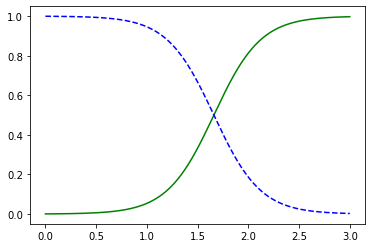

In [105]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginica")

In [106]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [117]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",
                                solver="lbfgs", C=10)

softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [119]:
softmax_reg.predict([[5,2]])

array([2])

In [120]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])